<a href="https://colab.research.google.com/github/HernanJMaurice/androidSensors/blob/main/HPC/Ejercicio_2_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_primer_imagen = "https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image1.jpeg?raw=true" #@param {type:"string"}
url_segunda_imagen = "https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image2.jpeg?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true -O imagen.jpg

# TODO: Mejorar información y resultado de ejecución. 
!wget {url_primer_imagen} -O imagen1.jpeg
!wget {url_segunda_imagen} -O imagen2.jpeg

--2020-11-16 01:33:14--  https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image1.jpeg?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HernanJMaurice/androidSensors/raw/main/HPC/imagenes/image1.jpeg [following]
--2020-11-16 01:33:14--  https://github.com/HernanJMaurice/androidSensors/raw/main/HPC/imagenes/image1.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HernanJMaurice/androidSensors/main/HPC/imagenes/image1.jpeg [following]
--2020-11-16 01:33:14--  https://raw.githubusercontent.com/HernanJMaurice/androidSensors/main/HPC/imagenes/image1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.git

Imagen del filtro: imagen1.jpeg -RGB- [960, 1280]
Imagen del filtro: imagen2.jpeg -RGB- [960, 1280]
Tiempo de conversión de imagen: 25638.365 [ms]
Tiempo Total: 25778.307 [ms]


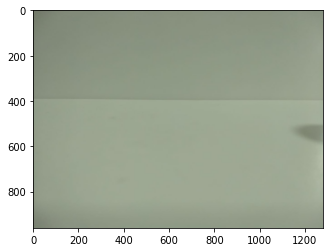

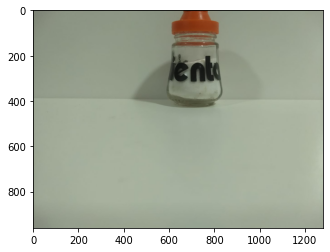

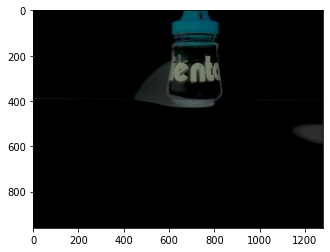

In [44]:
%matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

umbral_diferencia = 20

#---------------------------------------------
#           Primera Imagen
#---------------------------------------------

img_nombre = 'imagen1.jpeg'
image1 = Image.open( img_nombre ) 
  
# Optengo las proporsiones de la imagen. 
img1_alto, img1_ancho = image1.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img1_pic_cpu = numpy.asarray(image1)

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img1_picR_cpu = numpy.empty_like( img1_pic_cpu)

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image1.mode + "- [" + str(img1_ancho) + ", " + str(img1_alto ) + "]" )  

plt.figure()
imgplot=plt.imshow( img1_pic_cpu )


#---------------------------------------------
#           Segunda Imagen
#---------------------------------------------

img_nombre = 'imagen2.jpeg'
image2 = Image.open( img_nombre ) 
  
# Optengo las proporsiones de la imagen. 
img2_alto, img2_ancho = image2.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img2_pic_cpu = numpy.asarray(image2)

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img2_picR_cpu = numpy.empty_like( img2_pic_cpu)

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto ) + "]" )  

plt.figure()
imgplot=plt.imshow( img2_pic_cpu )

#---------------FIN IMAGENES----------------

if img2_alto != img1_alto:
  print("Imagenes diferentes")
  quit()

tiempo_img = datetime.now()

# Convierto la imagen a escala de grises
for y  in range( 0, img1_alto ):
  for x in range( 0, img1_ancho ):
#    print( x, y, img_pic_cpu[x][y] )
    pixel1_R, pixel1_G, pixel1_B = img1_pic_cpu[x][y]
    pixel2_R, pixel2_G, pixel2_B = img2_pic_cpu[x][y]

    if pixel2_R > pixel1_R :
        pr = pixel2_R - pixel1_R
    else:
        pr = pixel1_R - pixel2_R

    if pixel2_G > pixel1_G :
        pg = pixel2_G - pixel1_G
    else:
        pg = pixel1_G - pixel2_G

    if pixel2_B > pixel1_B :
        pb = pixel2_B - pixel1_B
    else:
        pb = pixel1_B - pixel2_B

    if pr < umbral_diferencia :
        pr = 0

    if pg < umbral_diferencia :
        pg = 0

    if pb < umbral_diferencia :
        pb = 0

    img1_picR_cpu[x][y] = [pr, pg, pb]

    gris = (pixel2_R*0.299)+(pixel2_G*0.599)+(pixel2_B*0.11)
    img2_picR_cpu[x][y] = [gris, gris, gris]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img1_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )
